# Group Project - Cat Image Classification

## Group 4: Isaiah Martinez, Joycelyn Tuazon
## Mrs. Lord - Comp 542 Machine Learning

# Guides that may provide insight

In [ ]:
#Count objects
#https://new.pythonforengineers.com/blog/image-and-video-processing-in-python/

#Basic outline for image classificaiton. See youtube video too.
#https://www.youtube.com/watch?v=il8dMDlXrIE
#https://github.com/computervisioneng/image-classification-python-scikit-learn/blob/master/main.py

#Image classification with Tensorflow and Keras
#https://www.tensorflow.org/tutorials/images/classification

#Load and Preprocess Images
#https://www.tensorflow.org/tutorials/load_data/images

## Kaggle Examples with Code to look at

In [ ]:
# Good to model after
# Also in the Conv2D section
# https://www.kaggle.com/code/shaileshkakade/image-classification-cat-dog-panda

# plots vertical/horizontal edge detection
# https://www.kaggle.com/code/dianalaveena/cnn-keras-image-classification
# Consider KNN

## CNN Examples

In [ ]:
# https://www.kaggle.com/code/dongduongminh/cnn-deep-learning-image-classification
# https://www.kaggle.com/code/nasrinjahanripa/animal-images-classification-cnn
# https://www.kaggle.com/code/corneliustantius/classification-with-keras-cnn
# SEE `explaining-line.ipynb`

## ConNeXt

In [ ]:
# https://www.kaggle.com/code/chenjiarui2018/cats-dogs-and-pandas-convnext#3.-Model

## VGG16 CNN

In [ ]:
# https://www.kaggle.com/code/arpita12/cat-dog-panda
# https://www.kaggle.com/code/rwt1998/animal-classification
# https://www.kaggle.com/code/atmaraiprince/animal-image-dataset
# https://www.kaggle.com/code/kkamal2003/animal-images-cnn

## Conv 2D

In [ ]:
# https://www.kaggle.com/code/shaileshkakade/image-classification-cat-dog-panda
# https://www.kaggle.com/code/etienne1976/animal-image-classification-with-keras
# https://www.kaggle.com/code/bygbrains/dog-cat-pandas-image-classifier
# https://www.kaggle.com/code/dianalaveena/cnn-keras-image-classification#5.-Model-Building-and-Compilation

## Res Net 50

In [ ]:
# https://www.kaggle.com/code/nasrinjahanripa/animal-images-classification-cnn
# https://www.kaggle.com/code/profmedo/image-classification-cnn-with-resnet
# https://www.kaggle.com/code/kkamal2003/resnet-for-classification
# https://www.kaggle.com/code/arshnoor7389/resnet-for-classification

## OpenAI - CLIP
## Dont use CLIP as project. CLIP may provide insight or be compared to, but not submitted for grade

In [ ]:
# GITHUB LINK:
# https://github.com/openai/CLIP/tree/main
# https://www.kaggle.com/code/kimchanyoung/zero-shot-prediction-using-openai-s-clip

# Dataset visualization

In [4]:
import projHelper as pjH

extremeSizes = pjH.calculateExtremeSizes("animals_cleaned")
print(extremeSizes[0], "\tMaxWidth")
print(extremeSizes[1], "\tMinWidth")
print(extremeSizes[2], "\tMaxHeight")
print(extremeSizes[3], "\tMinHeight")

(1600, 1200) 	MaxWidth
(55, 75) 	MinWidth
(1600, 1200) 	MaxHeight
(94, 69) 	MinHeight


In [5]:
#Find Avg dimensions of all images
avgDims = pjH.avgDims("animals_cleaned")
print(avgDims)

(431.78523035230353, 372.25271002710025)


In [6]:
import numpy as np
import keras

#randomly selected image by hand to convert to array
image = keras.preprocessing.image.load_img("animals/panda/panda_00880.jpg")

print(np.asarray(image))

[[[159 155 128]
  [162 161 131]
  [165 169 134]
  ...
  [120 141 162]
  [118 138 162]
  [119 139 163]]

 [[136 136 112]
  [154 157 128]
  [158 165 131]
  ...
  [124 144 168]
  [123 143 167]
  [125 145 169]]

 [[124 133 112]
  [127 137 112]
  [148 163 132]
  ...
  [132 154 178]
  [133 155 179]
  [135 157 181]]

 ...

 [[ 31  51  58]
  [ 26  46  53]
  [ 22  42  51]
  ...
  [ 53  55  42]
  [ 49  52  41]
  [ 48  51  40]]

 [[ 33  52  59]
  [ 29  48  55]
  [ 24  44  53]
  ...
  [ 50  52  41]
  [ 47  50  41]
  [ 47  50  41]]

 [[ 34  53  60]
  [ 29  48  55]
  [ 25  45  54]
  ...
  [ 45  47  36]
  [ 42  45  36]
  [ 43  46  37]]]


# Data Cleaning

### Note that the dataset was cleaned by hand into directory `animals_cleaned`

### See: `imgsRemoved.txt` for a list of images removed from the given dataset

In [1]:
#Resize all images into arrays
import projHelper as pjH

cats_resized = pjH.getResizedFlattenedArrays("animals_cleaned/cats/")
dogs_resized = pjH.getResizedFlattenedArrays("animals_cleaned/dogs/")
panda_resized = pjH.getResizedFlattenedArrays("animals_cleaned/panda/")

#each image is an array of 750,000
# (500 * 500 pixels) * 3 (RGB)

#expected: a single array of values [0, 255]
print(cats_resized[0])

#expected: 750,000
print(cats_resized[0].shape)

#Resized cat/dog/panda images into a single array of size 994/990/968
print("# cat imgs", len(cats_resized))
print("# dog imgs", len(dogs_resized))
print("# panda imgs", len(panda_resized))
print("total dataset size is", len(cats_resized) + len(dogs_resized) + len(panda_resized))

#20 second runtime

[ 80. 131. 162. ...  52.  35.  19.]
(750000,)
# cat imgs 994
# dog imgs 990
# panda imgs 968
total dataset size is 2952


In [2]:
#Resize all images into arrays
import projHelper as pjH

cats_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/cats/")
dogs_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/dogs/")
panda_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/panda/")

#each image is an array of 250,000
# (500 * 500 pixels)

#expected: a single array of values [0, 255]
print(cats_resized[0])

#expected: 250,000
print(cats_resized[0].shape)

#Resized cat/dog/panda images into a single array of size 994/990/968
print("# cat imgs", len(cats_resized))
print("# dog imgs", len(dogs_resized))
print("# panda imgs", len(panda_resized))
print("total dataset size is", len(cats_resized) + len(dogs_resized) + len(panda_resized))

#14 second runtime

[119. 120. 120. ...  37.  37.  38.]
(250000,)
# cat imgs 994
# dog imgs 990
# panda imgs 968
total dataset size is 2952


In [4]:
#Save the modified GrayScale images into animals_cleaned_GS directory
import projHelper as pjH

pjH.saveModifiedImages("animals_cleaned/cats/", "animals_cleaned_GS/cats/")
pjH.saveModifiedImages("animals_cleaned/dogs/", "animals_cleaned_GS/dogs/")
pjH.saveModifiedImages("animals_cleaned/panda/", "animals_cleaned_GS/panda/")

# Data Pre-Processing

In [5]:
#create labels and combine data into a single array

#insert labels into array
labels = ["cat"] * len(cats_resized) + ["dog"] * len(dogs_resized) + ["panda"] * len(panda_resized)

#combine data into a single array
data_resized = [*cats_resized, *dogs_resized, *panda_resized]

#compare sizes of labels and data_resized since they should be the same
#expected: True
print(len(data_resized) == len(labels))

#size of data_resized
print(len(data_resized))

#testing labels
#expected: cat cat dog dog panda panda
print(labels[0], labels[993], labels[994], labels[1983], labels[1984], labels[2951])

True
2952
cat cat dog dog panda panda


In [6]:
#split the data into train and test
from sklearn.model_selection import train_test_split

#80/20 split
xTrain, xTest, yTrain, yTest = train_test_split(data_resized, labels, test_size = 0.2)

print(len(xTrain), xTrain, "\n")
print(len(yTrain), yTrain, "\n")
print(len(xTest), xTest, "\n")
print(len(yTest), yTest, "\n")

#each array in xTrain and xTest is of type: float32
#the max value from xTrain and xTest is 255

2361 [array([204., 154., 136., ..., 113., 140., 134.], dtype=float32), array([92., 91., 90., ..., 33., 34., 35.], dtype=float32), array([195., 212., 215., ..., 119., 114.,  99.], dtype=float32), array([167., 167., 166., ..., 132., 132., 132.], dtype=float32), array([148., 130., 122., ..., 127., 122., 118.], dtype=float32), array([ 45.,  46.,  48., ..., 108., 103., 101.], dtype=float32), array([164., 165., 166., ..., 178., 177., 176.], dtype=float32), array([19., 19., 19., ..., 65., 63., 63.], dtype=float32), array([ 60.,  58.,  56., ...,  69.,  89., 101.], dtype=float32), array([125., 120., 118., ...,   0.,   1.,   1.], dtype=float32), array([110.,  51.,  25., ...,  11.,  11.,  11.], dtype=float32), array([132., 135., 155., ...,  87.,  92.,  88.], dtype=float32), array([45., 44., 41., ..., 98., 96., 98.], dtype=float32), array([21., 24., 28., ..., 12., 14., 16.], dtype=float32), array([ 77.,  62.,  45., ..., 104., 103., 102.], dtype=float32), array([ 23.,  23.,  24., ..., 132., 184., 1

# SVM Classifier

## Testing the svm classifier with no parameter changes

In [ ]:
#feed dataset into model

from sklearn import svm

clf = svm.SVC(kernel = 'linear', cache_size = 2000, max_iter = 5000, decision_function_shape = 'ovr', verbose = True)
clf.fit(xTrain, yTrain)

#15 minute runtime 750,000

#8 minute runtime 250,000

In [ ]:
#predict and obtain metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

yPred = clf.predict(xTest)

acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred, average = 'weighted')
prec = precision_score(yTest, yPred, average = 'weighted')
recall = recall_score(yTest, yPred, average = 'weighted')

print(acc, f1, prec, recall)

#4 minute runtime (750,000)

#metrics:
#0.5617597292724196 0.570465072568459 0.591411754950014 0.5617597292724196

#2 minute runtime (250,000)

#metrics:
#0.44839255499153974 0.4560295854772547 0.4798984919706284 0.44839255499153974

## Pipeline + GridSearch

In [ ]:
###     Final Pipeline
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.SVC(cache_size = 16000, max_iter = 5000, decision_function_shape = 'ovr', verbose = True))
])

params = {
    'classifier__C' : [5, 1]
}

gridSearch = GridSearchCV(pipeline, params, cv = 5, n_jobs = 1, verbose = 4)

gridSearch.fit(xTrain, yTrain)

#1750 minute runtime (initial 750,000) (250 fits)
#100 minute runtime   (initial 250,000) (1 fit)
#417 minute runtime   (initial 250,000) (15 fits)
#1051 minute runtime   (initial 250,000) (45 fits)

In [ ]:
#print the best params and best model found from Grid Search
gridSearchParams = gridSearch.best_params_
gridSearchModel = gridSearch.best_estimator_

print(gridSearchParams, gridSearchModel)

In [ ]:
#prediction and metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

yPred = gridSearchModel.predict(xTest)

acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred, average = 'weighted')
prec = precision_score(yTest, yPred, average = 'weighted')
recall = recall_score(yTest, yPred, average = 'weighted')

print(acc, f1, prec, recall)
#4 minute runtime

#initial run stats:
#0.5854483925549916 0.5885099209700294 0.5983072203381199 0.5854483925549916

#12 minute runtime 1 fit

#initial run stats: 1 fit
#0.6091370558375635 0.6054727828929725 0.6030864613210003 0.6091370558375635

#12 minute runtime 15 fits

#initial run stats: 1 fit
#0.6328257191201354 0.6299543290220251 0.6287454462588863 0.6328257191201354

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(yTest, yPred, labels = gridSearchModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gridSearchModel.classes_)
disp.plot()
plt.show()

# Res Net 50 

## Res Net 50 Data Prep

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

#recall allFiles from CLIP has all filepaths to all images (cats dogs and pandas)
#create labels and compare to make sure they are aligned together
allLabels = ["cat"] * len(catFiles) + ["dog"] * len(dogFiles) + ["panda"] * len(pandaFiles)

#print the filepath for the specified randomly selected images
print(allFiles[0], allFiles[1304], allFiles[2083])

#expected: cat, dog, panda
print(allLabels[0], allLabels[1304], allLabels[2083])

animals_cleaned/cats/cats_00001.jpg animals_cleaned/dogs/dogs_00314.jpg animals_cleaned/panda/panda_00107.jpg
cat dog panda


In [ ]:
#split into training, test, and validation set
from sklearn.model_selection import train_test_split

#80/20 train / rest
trainPaths, restPaths, trainLabels, restLabels = train_test_split(allFiles, allLabels, test_size = 0.2)

#Rest = 10/10 validation / test
valPaths, testPaths, valLabels, testLabels = train_test_split(restPaths, restLabels, test_size = 0.5)

#Resulting in 80/10/10 split for train / validation / test

print(trainPaths[0])
print(trainLabels[0])
print(valPaths[0])
print(valLabels[0])
print(testPaths[0])
print(testLabels[0])

animals_cleaned/cats/cats_00664.jpg
cat
animals_cleaned/panda/panda_00831.jpg
panda
animals_cleaned/dogs/dogs_00747.jpg
dog


In [ ]:
#outline Image Data Generator so we can augment the images and normalize the data concurrently
#normalization: [0,1]

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#effects that can be applied to the images to generate more images for training
trainDataGen = ImageDataGenerator(
    #normalize the data
    rescale = 1./255,

    #shear angle ccw (perspective shift)
    #may want to cut out and see performance change
    #   see: https://stackoverflow.com/questions/57301330/what-exactly-the-shear-do-in-imagedatagenerator-of-keras#:~:text='Shear'%20means%20that%20the%20image,see%20things%20from%20different%20angles.
    shear_range = 0.1,

    #how far to randomly zoom into img
    zoom_range = 0.2,

    #can flip imgs horizontally since they are all aligned vertically
    #       => cannot apply vertical flip or it will reduce accuracy/consistency amongst the dataset
    horizontal_flip = True
)

#for test and validation sets we will only normalize the data
valDataGen = ImageDataGenerator(rescale = 1./255)
testDataGen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#create dataframes from paths and labels
import pandas as pd

trainDF = pd.DataFrame({'path':trainPaths, 'animal':trainLabels})
valDF = pd.DataFrame({'path':valPaths, 'animal':valLabels})
testDF = pd.DataFrame({'path':testPaths, 'animal':testLabels})

print(trainDF.head())
print(valDF.head())
print(testDF.head())

                                    path animal
0    animals_cleaned/cats/cats_00664.jpg    cat
1    animals_cleaned/dogs/dogs_00919.jpg    dog
2  animals_cleaned/panda/panda_00304.jpg  panda
3  animals_cleaned/panda/panda_00647.jpg  panda
4  animals_cleaned/panda/panda_00685.jpg  panda
                                    path animal
0  animals_cleaned/panda/panda_00831.jpg  panda
1    animals_cleaned/dogs/dogs_00942.jpg    dog
2    animals_cleaned/dogs/dogs_00395.jpg    dog
3  animals_cleaned/panda/panda_00389.jpg  panda
4    animals_cleaned/dogs/dogs_00587.jpg    dog
                                    path animal
0    animals_cleaned/dogs/dogs_00747.jpg    dog
1  animals_cleaned/panda/panda_00892.jpg  panda
2  animals_cleaned/panda/panda_00228.jpg  panda
3    animals_cleaned/dogs/dogs_00351.jpg    dog
4    animals_cleaned/cats/cats_00475.jpg    cat


In [ ]:
#create Image Generators

#imgs to be resized to 224 x 224 for processing
imgDims = (224, 224)
batchSize = 32

trainGen = trainDataGen.flow_from_dataframe(
    trainDF,
    x_col = 'path',
    y_col = 'animal',
    target_size = imgDims,
    batch_size = batchSize,
    class_mode = 'categorical'
)

valGen = valDataGen.flow_from_dataframe(
    valDF,
    x_col = 'path',
    y_col = 'animal',
    target_size = imgDims,
    batch_size = batchSize,
    class_mode = 'categorical'
)

testGen = testDataGen.flow_from_dataframe(
    testDF,
    x_col = 'path',
    y_col = 'animal',
    target_size = imgDims,
    batch_size = batchSize,
    class_mode = 'categorical'
)

#notice validation and test have almost the same size

Found 2361 validated image filenames belonging to 3 classes.
Found 295 validated image filenames belonging to 3 classes.
Found 296 validated image filenames belonging to 3 classes.


## Res Net 50 base

In [ ]:
#build the model

#recall images have been resized to be 224 x 224 and are in RGB (thus 3)
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation = 'softmax') #1 per class => 3
])

In [ ]:
#model compiling and training
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# #get accuracy, precision, recall, AUC = ROC, and F1 score
# from tensorflow.keras import metrics
# metrics.Precision(), metrics.Recall(), metrics.AUC(), metrics.F1Score()

numEpochs = 10

history = model.fit(
    trainGen,
    epochs = numEpochs,
    validation_data = valGen
)

#15 minute runtime
#~1.5 min per epoch

Epoch 1/10
74/74 [==============================] - 87s 1s/step - loss: 2.8432 - accuracy: 0.4494 - val_loss: 0.8695 - val_accuracy: 0.5390
Epoch 2/10
74/74 [==============================] - 85s 1s/step - loss: 0.9205 - accuracy: 0.5061 - val_loss: 0.8781 - val_accuracy: 0.5322
Epoch 3/10
74/74 [==============================] - 86s 1s/step - loss: 0.9125 - accuracy: 0.5061 - val_loss: 0.8660 - val_accuracy: 0.5763
Epoch 4/10
74/74 [==============================] - 87s 1s/step - loss: 0.9019 - accuracy: 0.5214 - val_loss: 0.8659 - val_accuracy: 0.5797
Epoch 5/10
74/74 [==============================] - 89s 1s/step - loss: 0.8995 - accuracy: 0.5332 - val_loss: 0.8405 - val_accuracy: 0.5729
Epoch 6/10
74/74 [==============================] - 89s 1s/step - loss: 0.8842 - accuracy: 0.5434 - val_loss: 0.8085 - val_accuracy: 0.5661
Epoch 7/10
74/74 [==============================] - 90s 1s/step - loss: 0.8692 - accuracy: 0.5400 - val_loss: 0.8264 - val_accuracy: 0.5695
Epoch 8/10
74/74 [==

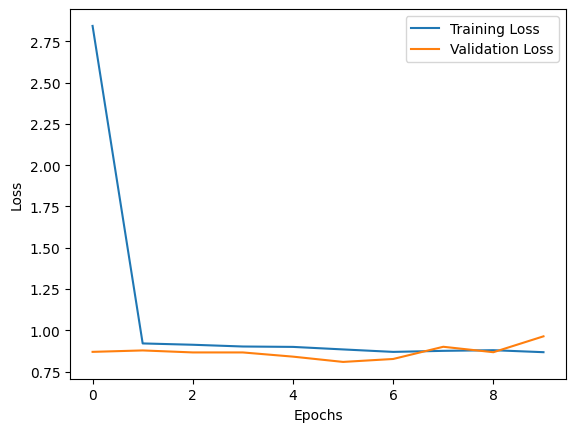

In [ ]:
#plot to see train/validation loss

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

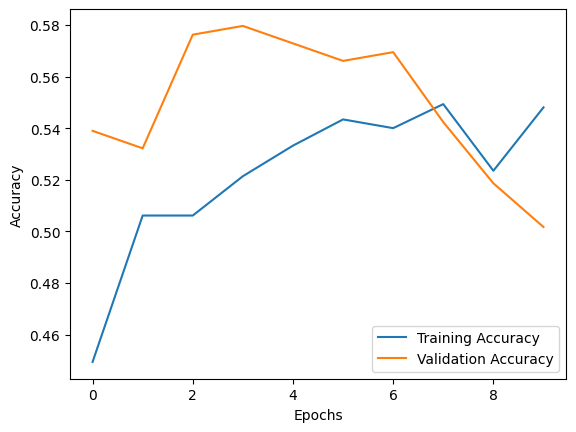

In [ ]:
#plot to see train/validation loss

# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate on validation data

valLoss, valAcc = model.evaluate(valGen)
print("Validation Loss:", valLoss)
print("Validation Accuracy:", valAcc)

10/10 [==============================] - 9s 854ms/step - loss: 0.9635 - accuracy: 0.5017
Validation Loss: 0.9634880423545837
Validation Accuracy: 0.501694917678833


In [ ]:
#evaluate on test data

testLoss, testAcc = model.evaluate(testGen)
print("Test Loss:", testLoss)
print("Test Accuracy:", testAcc)

10/10 [==============================] - 9s 856ms/step - loss: 0.9354 - accuracy: 0.5912
Test Loss: 0.9353681802749634
Test Accuracy: 0.5912162065505981


## Res Net 50 Modified V1

In [ ]:
#build the modified model
#this one will have 4 hidden layers with 0.2, 0.5, 0.5, and 0.5 dropout respectively

#recall images have been resized to be 224 x 224 and are in RGB (thus 3)
base_model2 = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
base_model2.trainable = False

model2 = models.Sequential([
    #given inputs to base model for ResNet50
    base_model2,
    layers.Flatten(),
    
    #1st hidden layer with relu and 0.2 dropout
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.2),

    #2nd hidden layer with relu and 0.5 dropout
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.2),

    #3rd hidden layer with relu and 0.5 dropout
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.2),

    #output layer
    layers.Dense(3, activation = 'softmax') #1 per class => 3
])

In [ ]:
#model compiling and training
model2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# #get accuracy, precision, recall, AUC = ROC, and F1 score
# from tensorflow.keras import metrics
# metrics.Precision(), metrics.Recall(), metrics.AUC(), metrics.F1Score()

history2 = model2.fit(
    trainGen,
    epochs = numEpochs,
    validation_data = valGen
)

#20 minute runtime
#~1.5 min per epoch

Epoch 1/10
74/74 [==============================] - 141s 2s/step - loss: 1.7255 - accuracy: 0.4312 - val_loss: 0.9044 - val_accuracy: 0.5220
Epoch 2/10
74/74 [==============================] - 135s 2s/step - loss: 1.0265 - accuracy: 0.4625 - val_loss: 1.1526 - val_accuracy: 0.3627
Epoch 3/10
74/74 [==============================] - 134s 2s/step - loss: 0.9724 - accuracy: 0.5116 - val_loss: 0.9034 - val_accuracy: 0.5254
Epoch 4/10
74/74 [==============================] - 134s 2s/step - loss: 0.9681 - accuracy: 0.4956 - val_loss: 0.8970 - val_accuracy: 0.5356
Epoch 5/10
74/74 [==============================] - 133s 2s/step - loss: 0.9381 - accuracy: 0.5155 - val_loss: 0.9093 - val_accuracy: 0.5051
Epoch 6/10
74/74 [==============================] - 131s 2s/step - loss: 0.9262 - accuracy: 0.5307 - val_loss: 0.8980 - val_accuracy: 0.5186
Epoch 7/10
74/74 [==============================] - 129s 2s/step - loss: 0.9242 - accuracy: 0.5345 - val_loss: 0.9649 - val_accuracy: 0.4746
Epoch 8/10
74

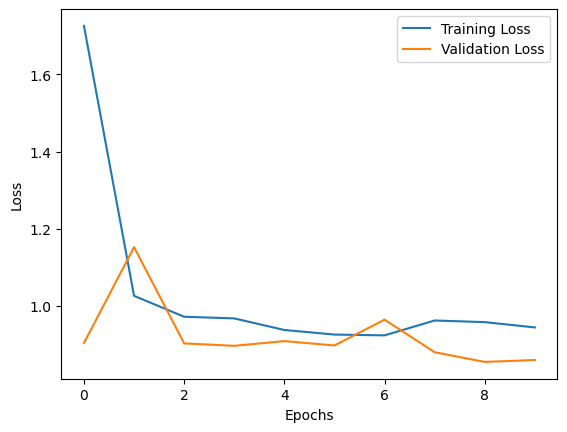

In [ ]:
# Plot training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

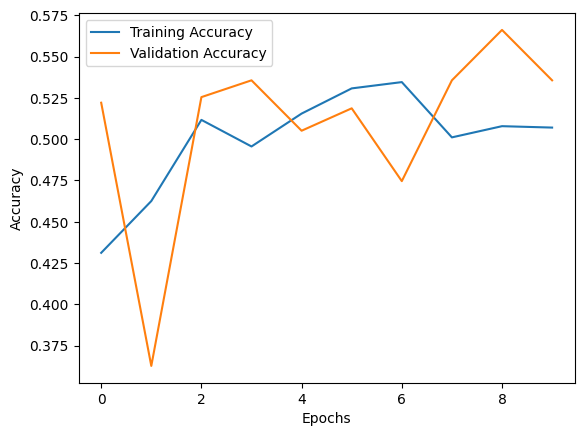

In [ ]:
#plot to see train/validation loss
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate on validation data

valLoss, valAcc = model2.evaluate(valGen)
print("Validation Loss:", valLoss)
print("Validation Accuracy:", valAcc)

10/10 [==============================] - 14s 1s/step - loss: 0.8603 - accuracy: 0.5356
Validation Loss: 0.8603267073631287
Validation Accuracy: 0.5355932116508484


In [ ]:
#evaluate on test data

testLoss, testAcc = model2.evaluate(testGen)
print("Test Loss:", testLoss)
print("Test Accuracy:", testAcc)

10/10 [==============================] - 9s 912ms/step - loss: 1.1122 - accuracy: 0.2973
Test Loss: 1.1121528148651123
Test Accuracy: 0.29729729890823364


## Res Net 50 Modified V2 w/ Stats

In [ ]:
#build the modified model
#this one will have 3 hidden layers with 0.2, 0.5, and 0.5 dropout respectively

#recall images have been resized to be 224 x 224 and are in RGB (thus 3)
base_model3 = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
base_model3.trainable = False

model3 = models.Sequential([
    #given inputs to base model for ResNet50
    base_model3,
    layers.Flatten(),
    
    #1st hidden layer with relu and 0.2 dropout
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.2),

    #2nd hidden layer with relu and 0.5 dropout
    layers.Dense(200, activation = 'relu'),
    layers.Dropout(0.3),

    #3rd hidden layer with relu and 0.5 dropout
    layers.Dense(125, activation = 'relu'),

    #4th hidden layer with relu and 0.5 dropout
    layers.Dense(50, activation = 'relu'),

    #output layer
    layers.Dense(3, activation = 'softmax') #1 per class => 3
])

In [ ]:
from tensorflow.keras import metrics

#model compiling and training

model3.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 
               metrics.Precision(class_id = 0), metrics.Precision(class_id = 1), metrics.Precision(class_id = 2)
               ])

# #get accuracy, precision, recall, AUC = ROC, and F1 score
# from tensorflow.keras import metrics
# metrics.Recall(), metrics.AUC(), metrics.F1Score()

history3 = model3.fit(
    trainGen,
    epochs = numEpochs,
    validation_data = valGen
)

#20 minute runtime
#~1.5 min per epoch

Epoch 1/10
74/74 [==============================] - 146s 2s/step - loss: 1.6428 - accuracy: 0.3706 - precision_25: 0.3610 - precision_26: 0.3471 - precision_27: 0.4286 - val_loss: 0.9290 - val_accuracy: 0.5017 - val_precision_25: 0.0000e+00 - val_precision_26: 0.0000e+00 - val_precision_27: 0.7636
Epoch 2/10
74/74 [==============================] - 140s 2s/step - loss: 0.9745 - accuracy: 0.4900 - precision_25: 0.5241 - precision_26: 0.3701 - precision_27: 0.6979 - val_loss: 0.9189 - val_accuracy: 0.5017 - val_precision_25: 0.5161 - val_precision_26: 0.0000e+00 - val_precision_27: 0.5833
Epoch 3/10
74/74 [==============================] - 139s 2s/step - loss: 0.9167 - accuracy: 0.5188 - precision_25: 0.4990 - precision_26: 0.4245 - precision_27: 0.7315 - val_loss: 1.0033 - val_accuracy: 0.4169 - val_precision_25: 0.0000e+00 - val_precision_26: 0.0000e+00 - val_precision_27: 0.5887
Epoch 4/10
74/74 [==============================] - 140s 2s/step - loss: 0.9222 - accuracy: 0.5290 - precis

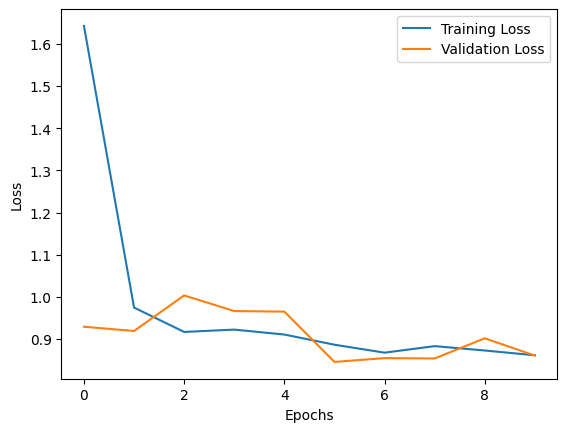

In [ ]:
# Plot training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

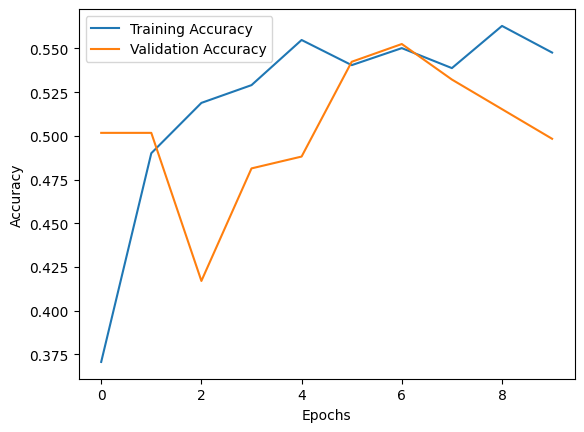

In [ ]:
#plot to see train/validation loss
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Zero-Shot Prediction CLIP

## Sample with 1 image

### ViT-B/32

In [1]:
import torch
import clip
from PIL import Image
import numpy as np

#make device with cuda (GPU) if available, otherwise uses the CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

#loads the model ViT-B/32, and preprocess
model, preprocess = clip.load("ViT-B/32", device = device)

#preprocess the image and load it into the device
img = preprocess(Image.open("animals_cleaned/cats/cats_00001.jpg")).unsqueeze(0).to(device)

#categories to be used by model
animals = ['cat', 'dog', 'panda']

#add text (categories) to device
text = clip.tokenize(animals).to(device)

#read the image and text to obtain the Logits
#use the Logits as input for softmax function to obtain probabilities
#Note: `_` denotes a var/output we dont care about
with torch.no_grad():
    logitsPerImg, _ = model(img, text)
    probs = np.array(logitsPerImg.softmax(dim = -1).cpu().numpy())

#take largest probability as label
label = np.argmax(probs[0])

#print probability of highest class
print(probs[0][label])

#print predicted class
print(animals[label])

#list of each probability for each class
print(probs[0])

0.9885767
cat
[0.9885767  0.00973916 0.00168417]


### RN50x16

In [2]:
import torch
import clip
from PIL import Image
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

#loads the model RN50x16, and preprocess
model, preprocess = clip.load("RN50x16", device = device)

img = preprocess(Image.open("animals_cleaned/cats/cats_00001.jpg")).unsqueeze(0).to(device)

animals = ['cat', 'dog', 'panda']

text = clip.tokenize(animals).to(device)

with torch.no_grad():
    logitsPerImg, _ = model(img, text)
    probs = np.array(logitsPerImg.softmax(dim = -1).cpu().numpy())

label = np.argmax(probs[0])

#print probability of highest class
print(probs[0][label])

#print predicted class
print(animals[label])

0.99359655
cat


## On All Images

### Preprocessing all files for images

In [8]:
#gather all filepaths to all images
from os import listdir
from os.path import isfile, join

catFiles = [f for f in listdir("animals_cleaned/cats/") if isfile(join("animals_cleaned/cats/", f))]
dogFiles = [f for f in listdir("animals_cleaned/dogs/") if isfile(join("animals_cleaned/dogs/", f))]
pandaFiles = [f for f in listdir("animals_cleaned/panda/") if isfile(join("animals_cleaned/panda/", f))]

print(catFiles)
print(len(catFiles))

['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00011.jpg', 'cats_00012.jpg', 'cats_00013.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00016.jpg', 'cats_00017.jpg', 'cats_00018.jpg', 'cats_00019.jpg', 'cats_00020.jpg', 'cats_00021.jpg', 'cats_00022.jpg', 'cats_00023.jpg', 'cats_00024.jpg', 'cats_00025.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00028.jpg', 'cats_00029.jpg', 'cats_00030.jpg', 'cats_00031.jpg', 'cats_00033.jpg', 'cats_00034.jpg', 'cats_00035.jpg', 'cats_00036.jpg', 'cats_00037.jpg', 'cats_00038.jpg', 'cats_00039.jpg', 'cats_00040.jpg', 'cats_00041.jpg', 'cats_00042.jpg', 'cats_00043.jpg', 'cats_00044.jpg', 'cats_00045.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00048.jpg', 'cats_00049.jpg', 'cats_00050.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00053.jpg', 'cats_00054.jpg', 'cats_00055.jpg', 'cats_00056.jpg', 'cats_000

In [9]:
#add the entire path to the images

for i in range(len(catFiles)):
    catFiles[i] = "animals_cleaned/cats/" + catFiles[i]

for i in range(len(dogFiles)):
    dogFiles[i] = "animals_cleaned/dogs/" + dogFiles[i]

for i in range(len(pandaFiles)):
    pandaFiles[i] = "animals_cleaned/panda/" + pandaFiles[i]

In [10]:
#make a single list containing all files

allFiles = [*catFiles, *dogFiles, *pandaFiles]

print(allFiles)
print(len(allFiles))

['animals_cleaned/cats/cats_00001.jpg', 'animals_cleaned/cats/cats_00002.jpg', 'animals_cleaned/cats/cats_00003.jpg', 'animals_cleaned/cats/cats_00004.jpg', 'animals_cleaned/cats/cats_00005.jpg', 'animals_cleaned/cats/cats_00006.jpg', 'animals_cleaned/cats/cats_00007.jpg', 'animals_cleaned/cats/cats_00008.jpg', 'animals_cleaned/cats/cats_00009.jpg', 'animals_cleaned/cats/cats_00010.jpg', 'animals_cleaned/cats/cats_00011.jpg', 'animals_cleaned/cats/cats_00012.jpg', 'animals_cleaned/cats/cats_00013.jpg', 'animals_cleaned/cats/cats_00014.jpg', 'animals_cleaned/cats/cats_00015.jpg', 'animals_cleaned/cats/cats_00016.jpg', 'animals_cleaned/cats/cats_00017.jpg', 'animals_cleaned/cats/cats_00018.jpg', 'animals_cleaned/cats/cats_00019.jpg', 'animals_cleaned/cats/cats_00020.jpg', 'animals_cleaned/cats/cats_00021.jpg', 'animals_cleaned/cats/cats_00022.jpg', 'animals_cleaned/cats/cats_00023.jpg', 'animals_cleaned/cats/cats_00024.jpg', 'animals_cleaned/cats/cats_00025.jpg', 'animals_cleaned/cats/ca

### ViT-B/32

In [6]:
#Make the Confusion Matrix manually

import numpy as np

#initalize as empty 3x3 matrix and update as we make predictions
#read columns in order: cat, dog, panda     as prediction
#read rows in order:    cat, dog, panda     as actual
# i.e. cm[ACTUAL, PREDICTED]
#       eg. cm[1,2] means the actual animal was a dog while the predicted was a panda
cmViT = np.zeros((3,3), dtype = 'int')

print(cmViT)
print(type(cmViT))

[[0 0 0]
 [0 0 0]
 [0 0 0]]
<class 'numpy.ndarray'>


In [7]:
import projHelper as pjH

#run all the data and obtain the confusion matrix and probabilities for each

cmViT, probabilitiesCatsViT = pjH.getCMProbs(0, catFiles, cmViT, 0)
cmViT, probabilitiesDogsViT = pjH.getCMProbs(0, dogFiles, cmViT, 1)
cmViT, probabilitiesPandaViT = pjH.getCMProbs(0, pandaFiles, cmViT, 2)

In [8]:
print(cmViT)
print(probabilitiesCatsViT[0])
print(probabilitiesDogsViT[0])
print(probabilitiesPandaViT[0])

[[991   1   2]
 [  4 986   0]
 [  0   1 967]]
0.9885767
0.99884665
0.99997103


### RN50x16

In [9]:
#initialize cm for RN50
cmRN = np.zeros((3,3), dtype = 'int')

In [10]:
import projHelper as pjH

#run all the data and obtain the confusion matrix and probabilities for each 

cmRN, probabilitiesCatsRN = pjH.getCMProbs(1, catFiles, cmRN, 0)
cmRN, probabilitiesDogsRN = pjH.getCMProbs(1, dogFiles, cmRN, 1)
cmRN, probabilitiesPandaRN = pjH.getCMProbs(1, pandaFiles, cmRN, 2)

In [11]:
print(cmRN)
print(probabilitiesCatsRN[0])
print(probabilitiesDogsRN[0])
print(probabilitiesPandaRN[0])

[[993   1   0]
 [  2 988   0]
 [  0   0 968]]
0.99359655
0.99184376
0.99996495
